### Imports

In [19]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

#### Data Directory

In [20]:
# folder path
data_folder = 'SolarPanelSoilingImageDataset\Solar_Panel_Soiling_Image_dataset\PanelImages_originaldata/'

In [21]:
files = os.listdir(data_folder)

## Structure of the file name

solar_day_Month_date_hour__minute__second__year_L_%ageloss_I_irradiancelevel.jpg


In [22]:
files[0:10]

['solar_Fri_Jun_16_10__0__11_2017_L_0.906153208302_I_0.321592156863.jpg',
 'solar_Fri_Jun_16_10__0__16_2017_L_0.903081697073_I_0.293192156863.jpg',
 'solar_Fri_Jun_16_10__0__1_2017_L_0.916698044034_I_0.39577254902.jpg',
 'solar_Fri_Jun_16_10__0__21_2017_L_0.903081697073_I_0.293192156863.jpg',
 'solar_Fri_Jun_16_10__0__26_2017_L_0.896087391118_I_0.27462745098.jpg',
 'solar_Fri_Jun_16_10__0__31_2017_L_0.896087391118_I_0.27462745098.jpg',
 'solar_Fri_Jun_16_10__0__36_2017_L_0.894974574172_I_0.269141176471.jpg',
 'solar_Fri_Jun_16_10__0__41_2017_L_0.894974574172_I_0.269141176471.jpg',
 'solar_Fri_Jun_16_10__0__46_2017_L_0.890988502987_I_0.261278431373.jpg',
 'solar_Fri_Jun_16_10__0__51_2017_L_0.890988502987_I_0.261278431373.jpg']

### Preprocessing for the dataframe

#### Breaking down string into time component columns

In [23]:
examples = []
for file in files:
    parts = file.split('_')
    solar_data = {
        'type': parts[0], # 'solar'
        'day_of_week': parts[1], # day of the week
        'month': parts[2],
        'day': parts[3], # day
        'hour': parts[4], # hout
        'minute': parts[6], # minute
        'second': parts[8], # second
        'year': parts[9], # 'year'
        'loss_percentage': parts[11], # 'ageloss' with 'L%' removed
        'irradiance_level': parts[13][0:-4], # 'irradiancelevel' with 'I' removed
        'original_title': file,
    }
    examples.append(solar_data)

In [24]:
df = pd.DataFrame(examples)

In [25]:
df

,type,day_of_week,month,day,hour,minute,second,year,loss_percentage,irradiance_level,original_title
0,solar,Fri,Jun,16,10,0,11,2017,0.906153208302,0.321592156863,solar_Fri_Jun_16_10__0__11_2017_L_0.9061532083...
1,solar,Fri,Jun,16,10,0,16,2017,0.903081697073,0.293192156863,solar_Fri_Jun_16_10__0__16_2017_L_0.9030816970...
2,solar,Fri,Jun,16,10,0,1,2017,0.916698044034,0.39577254902,solar_Fri_Jun_16_10__0__1_2017_L_0.91669804403...
3,solar,Fri,Jun,16,10,0,21,2017,0.903081697073,0.293192156863,solar_Fri_Jun_16_10__0__21_2017_L_0.9030816970...
4,solar,Fri,Jun,16,10,0,26,2017,0.896087391118,0.27462745098,solar_Fri_Jun_16_10__0__26_2017_L_0.8960873911...
...,...,...,...,...,...,...,...,...,...,...,...
45749,solar,Wed,Jun,28,7,9,44,2017,0.0067850003029,0.0647333333333,solar_Wed_Jun_28_7__9__44_2017_L_0.00678500030...
45750,solar,Wed,Jun,28,7,9,49,2017,0.0067850003029,0.0647333333333,solar_Wed_Jun_28_7__9__49_2017_L_0.00678500030...
45751,solar,Wed,Jun,28,7,9,54,2017,0.0210669184468,0.0664549019608,solar_Wed_Jun_28_7__9__54_2017_L_0.02106691844...
45752,solar,Wed,Jun,28,7,9,59,2017,0.0210669184468,0.0664549019608,solar_Wed_Jun_28_7__9__59_2017_L_0.02106691844...


In [26]:
df['loss_percentage'] = pd.to_numeric(df['loss_percentage'], errors='coerce')
df['irradiance_level'] = pd.to_numeric(df['irradiance_level'])

In [35]:
# Month name to numerical mapping
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

df = pd.DataFrame(examples)
df['loss_percentage'] = pd.to_numeric(df['loss_percentage'], errors='coerce')
df['irradiance_level'] = pd.to_numeric(df['irradiance_level'])

df['month'] = df['month'].map(month_mapping)

df['timestamp'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']])


df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['hour'] = df['hour'].astype(int)


df = df.sort_values(by='timestamp')

df = df.drop(columns=['timestamp' , 'day_of_week', 'type'])


df


,month,day,hour,minute,second,year,loss_percentage,irradiance_level,original_title
28465,6,13,9,46,49,2017,0.047484,0.296733,solar_Tue_Jun_13_9__46__49_2017_L_0.0474843723...
28466,6,13,9,46,54,2017,0.027331,0.288831,solar_Tue_Jun_13_9__46__54_2017_L_0.0273312333...
28467,6,13,9,46,59,2017,0.027331,0.288831,solar_Tue_Jun_13_9__46__59_2017_L_0.0273312333...
28468,6,13,9,47,4,2017,0.039799,0.300631,solar_Tue_Jun_13_9__47__4_2017_L_0.03979859380...
28470,6,13,9,47,9,2017,0.039799,0.300631,solar_Tue_Jun_13_9__47__9_2017_L_0.03979859380...
...,...,...,...,...,...,...,...,...,...
7738,6,30,15,53,27,2017,0.567408,0.243176,solar_Fri_Jun_30_15__53__27_2017_L_0.567408482...
7739,6,30,15,53,32,2017,0.567408,0.243176,solar_Fri_Jun_30_15__53__32_2017_L_0.567408482...
7742,6,30,15,54,7,2017,0.565741,0.291667,solar_Fri_Jun_30_15__54__7_2017_L_0.5657411764...
7741,6,30,15,54,12,2017,0.565741,0.291667,solar_Fri_Jun_30_15__54__12_2017_L_0.565741176...


#### Create unique ID

In [36]:
# Reset the index to create a new column 'unique_id'
df['unique_id'] = df.reset_index().index

df

,month,day,hour,minute,second,year,loss_percentage,irradiance_level,original_title,unique_id
28465,6,13,9,46,49,2017,0.047484,0.296733,solar_Tue_Jun_13_9__46__49_2017_L_0.0474843723...,0
28466,6,13,9,46,54,2017,0.027331,0.288831,solar_Tue_Jun_13_9__46__54_2017_L_0.0273312333...,1
28467,6,13,9,46,59,2017,0.027331,0.288831,solar_Tue_Jun_13_9__46__59_2017_L_0.0273312333...,2
28468,6,13,9,47,4,2017,0.039799,0.300631,solar_Tue_Jun_13_9__47__4_2017_L_0.03979859380...,3
28470,6,13,9,47,9,2017,0.039799,0.300631,solar_Tue_Jun_13_9__47__9_2017_L_0.03979859380...,4
...,...,...,...,...,...,...,...,...,...,...
7738,6,30,15,53,27,2017,0.567408,0.243176,solar_Fri_Jun_30_15__53__27_2017_L_0.567408482...,45749
7739,6,30,15,53,32,2017,0.567408,0.243176,solar_Fri_Jun_30_15__53__32_2017_L_0.567408482...,45750
7742,6,30,15,54,7,2017,0.565741,0.291667,solar_Fri_Jun_30_15__54__7_2017_L_0.5657411764...,45751
7741,6,30,15,54,12,2017,0.565741,0.291667,solar_Fri_Jun_30_15__54__12_2017_L_0.565741176...,45752


### Max Value and minimum value Per atribute

In [29]:
max_loss_percentage = df['loss_percentage'].max()
min_loss_percentage = df['loss_percentage'].min()

max_irradiance_level = df['irradiance_level'].max()
min_irradiance_level = df['irradiance_level'].min()

print("Max Loss Percentage:", max_loss_percentage)
print("Min Loss Percentage:", min_loss_percentage)
print("Max Irradiance Level:", max_irradiance_level)
print("Min Irradiance Level:", min_irradiance_level)

Max Loss Percentage: 0.996158869171
Min Loss Percentage: 0.0
Max Irradiance Level: 1.0061254902
Min Irradiance Level: 0.00268235294118


#### Visualization

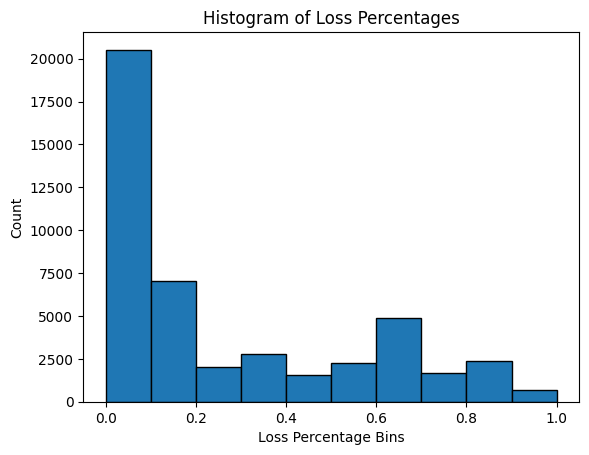

Bin 0.0 - 0.1: 20523 counts
Bin 0.1 - 0.2: 7014 counts
Bin 0.2 - 0.3: 2045 counts
Bin 0.3 - 0.4: 2799 counts
Bin 0.4 - 0.5: 1542 counts
Bin 0.5 - 0.6: 2232 counts
Bin 0.6 - 0.7: 4899 counts
Bin 0.7 - 0.8: 1671 counts
Bin 0.8 - 0.9: 2369 counts
Bin 0.9 - 1.0: 660 counts


In [30]:
# Set the bin width
bin_width = 0.1

# Create bins from 0 to 1 with a step of bin_width
bins = np.arange(0, 1.1, bin_width)

# Count occurrences in each bin
hist, bin_edges = np.histogram(df['loss_percentage'], bins=bins)

# Visualize the histogram
plt.bar(bins[:-1], hist, width=bin_width, align='edge', edgecolor='black')
plt.xlabel('Loss Percentage Bins')
plt.ylabel('Count')
plt.title('Histogram of Loss Percentages')
plt.show()

# Display the results
for i in range(len(hist)):
    print(f"Bin {bins[i]:.1f} - {bins[i+1]:.1f}: {hist[i]} counts")

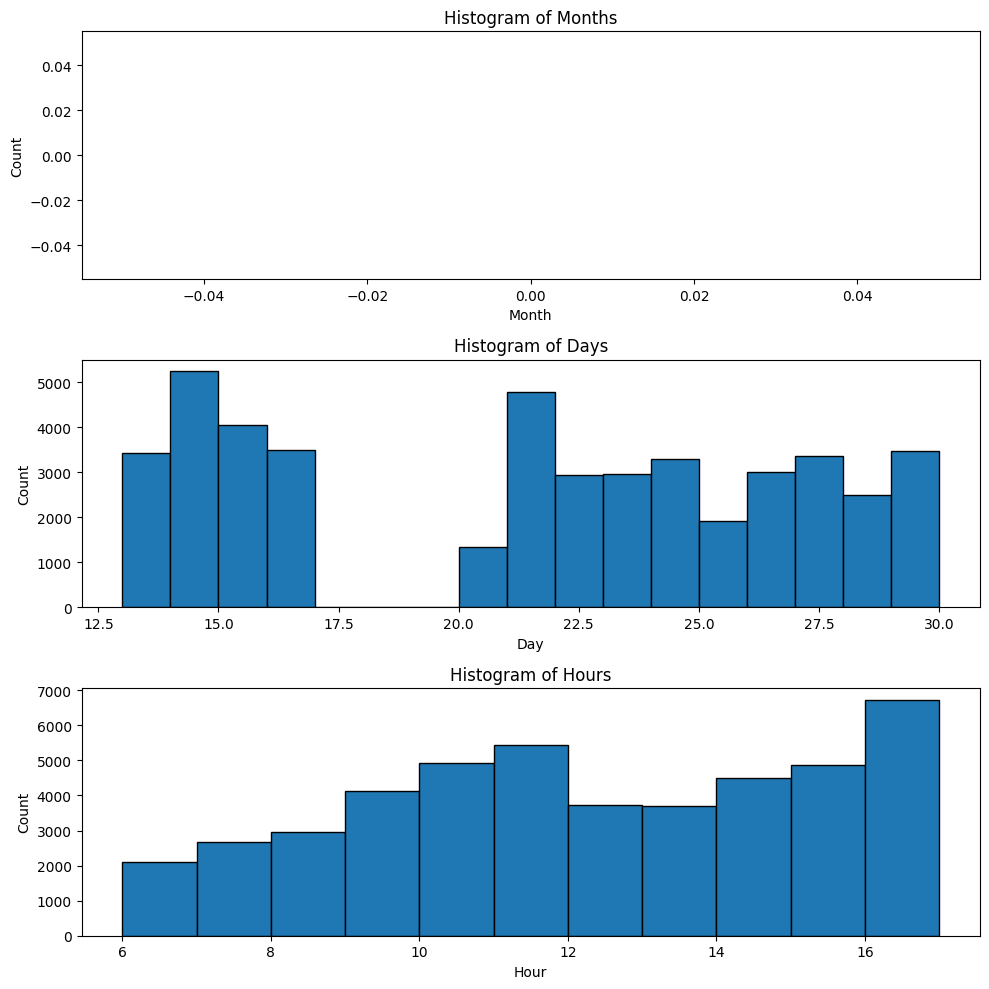

In [31]:
# Set the bin width for month, day, and hour
month_bin_width = 1
day_bin_width = 1
hour_bin_width = 1

# Create histograms for month, day, and hour
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

# Month histogram
axes[0].hist(df['month'], bins=np.arange(df['month'].min(), df['month'].max() + month_bin_width, month_bin_width), edgecolor='black')
axes[0].set_title('Histogram of Months')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')

# Day histogram
axes[1].hist(df['day'], bins=np.arange(df['day'].min(), df['day'].max() + day_bin_width, day_bin_width), edgecolor='black')
axes[1].set_title('Histogram of Days')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Count')

# Hour histogram
axes[2].hist(df['hour'], bins=np.arange(df['hour'].min(), df['hour'].max() + hour_bin_width, hour_bin_width), edgecolor='black')
axes[2].set_title('Histogram of Hours')
axes[2].set_xlabel('Hour')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

#### Remove observations that happen within a 30 second window of an obseration

- Observations that happen within a really close range are verry similiar so, to a certain extent, they are duplicates

In [33]:
# Create a clone (copy) of the dataset
df_copy = df.copy()

# Create a datetime column in the copy
df_copy['datetime'] = pd.to_datetime(df_copy[['year', 'month', 'day', 'hour', 'minute', 'second']])

# Ensure the copy is ordered in ascending order based on datetime
df_copy = df_copy.sort_values(by='datetime')

# Calculate the time difference between consecutive rows
df_copy['time_diff'] = df_copy['datetime'].diff()

# Filter rows based on the 20-second range or date change condition
filtered_df = df_copy[(df_copy['time_diff'].dt.total_seconds() > 20) |
                      (df_copy['datetime'].dt.date != df_copy['datetime'].shift().dt.date) |
                      df_copy['time_diff'].isna()]

# Drop unnecessary columns
filtered_df = filtered_df.drop(['datetime', 'time_diff'], axis=1)

# Reset index if needed
filtered_df = filtered_df.reset_index(drop=True)

filtered_df

,month,day,hour,minute,second,year,loss_percentage,irradiance_level,original_title,unique_id
0,6,13,9,46,49,2017,0.047484,0.296733,solar_Tue_Jun_13_9__46__49_2017_L_0.0474843723...,0
1,6,13,9,47,54,2017,0.021836,0.613851,solar_Tue_Jun_13_9__47__54_2017_L_0.0218357907...,5
2,6,13,9,49,36,2017,0.449538,0.652835,solar_Tue_Jun_13_9__49__36_2017_L_0.4495383635...,12
3,6,13,9,51,32,2017,0.061690,0.376580,solar_Tue_Jun_13_9__51__32_2017_L_0.0616903403...,19
4,6,13,9,52,2,2017,0.322995,0.432800,solar_Tue_Jun_13_9__52__2_2017_L_0.32299481715...,21
...,...,...,...,...,...,...,...,...,...,...
2151,6,30,15,20,46,2017,0.566062,0.305953,solar_Fri_Jun_30_15__20__46_2017_L_0.566061678...,45593
2152,6,30,15,22,17,2017,0.557589,0.295945,solar_Fri_Jun_30_15__22__17_2017_L_0.557588847...,45605
2153,6,30,15,53,7,2017,0.559479,0.226212,solar_Fri_Jun_30_15__53__7_2017_L_0.5594792316...,45745
2154,6,30,15,54,7,2017,0.565741,0.291667,solar_Fri_Jun_30_15__54__7_2017_L_0.5657411764...,45751


In [16]:
# filtered_df.to_csv('df_final.csv')